# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
data=pd.read_csv("../DATASET/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.corr()

ValueError: could not convert string to float: 'Male'

# Extracting Independant Variable

In [19]:
x = data.iloc[:, [2,3,4]].values  

In [20]:
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [21]:
x[:,0] #age

array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 59, 50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68,
       19, 32, 70, 47, 60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21,
       48, 55, 22, 34, 50, 68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       67, 26, 49, 21, 66, 54, 68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 59, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 52, 30, 58, 27, 59, 35, 37, 32, 46, 29, 41, 30, 54,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30], dtype=int64)

In [22]:
x[:,1] #Income

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [23]:
x[:,2] #Spending

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

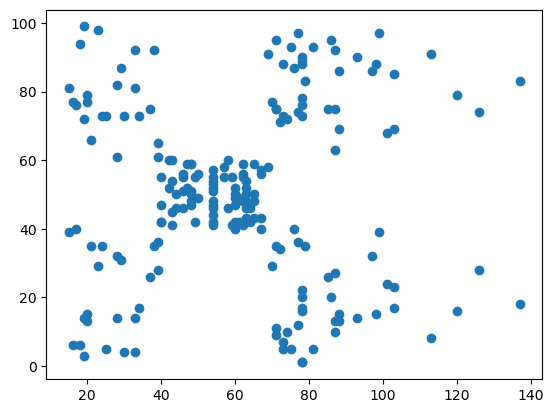

In [11]:
plt.scatter(x[:,0],x[:,1])

# Finding optimal number of clusters using the elbow method  

k.inertia_  = within cluster sum of square of distance between each point and centroid 
k.labels_   = Cluster number
k.cluster_centers_  = coordinates of centroids

308812.77999999997
212840.16982097187
143342.75157170597
104366.15145556198
75378.76464074483
58302.40630860369
51118.94993164731
44312.46881207722
40894.98978213978
37468.51571576571


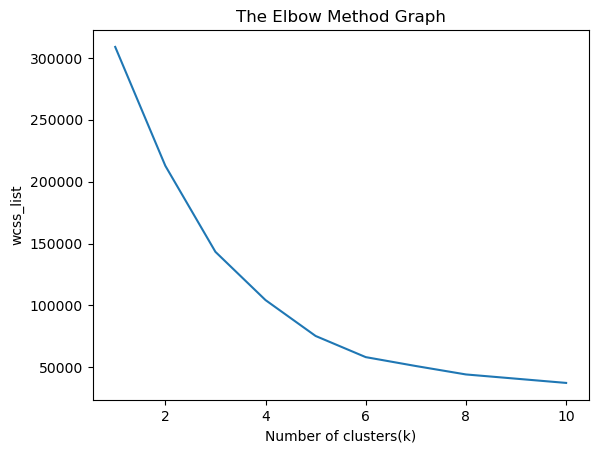

In [24]:
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

# Training the K-means model on a dataset  

In [25]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [26]:
print(y_predict) #Predicted labels

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 0 4 0 3 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2
 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
 4 4 4 4 4 2 2 2 2 4 4 4 1 4 1 5 1 5 1 5 1 4 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]


In [27]:
data['cluster']=y_predict #adding new column named cluster to dataset which contains predicted labels for data points
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          0  
1          3  
2          0  
3          3  
4          0

In [28]:
print(kmeans.labels_)   # predicted labels of data poins

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 0 4 0 3 2 4 4 4 2 4 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2
 2 4 2 4 4 2 2 4 2 2 4 2 2 4 4 2 2 4 2 4 4 4 2 4 2 4 4 2 2 4 2 4 2 2 2 2 2
 4 4 4 4 4 2 2 2 2 4 4 4 1 4 1 5 1 5 1 5 1 4 1 5 1 5 1 5 1 5 1 4 1 5 1 5 1
 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1]


In [29]:
print(kmeans.cluster_centers_)

[[44.31818182 25.77272727 20.27272727]
 [32.69230769 86.53846154 82.12820513]
 [56.34090909 53.70454545 49.38636364]
 [25.27272727 25.72727273 79.36363636]
 [27.         56.65789474 49.13157895]
 [41.68571429 88.22857143 17.28571429]]


# Visulaizing the clusters 

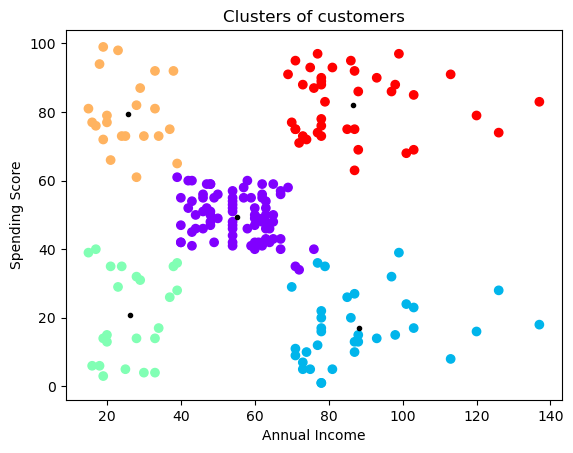

In [18]:
plt.scatter(x[:,0],x[:,1],c=y_predict,cmap='rainbow')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'.',color='black')
plt.title('Clusters of customers')  
plt.xlabel('Annual Income')  
plt.ylabel('Spending Score')  
plt.show()  